In [1]:
!pip install diffusers['torch'] transformers
!pip install accelerate peft
!pip install git+https://github.com/huggingface/diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 7.0 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-7635fz76
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-7635fz76
  Resolved https://github.com/huggingface/diffusers to commit f28a8c257afe8eeb16b4deb973c6b1829f6aea59
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2739142 sha256=1a299a0bcd4fb096899734cfb27db0a19640e2c7f4da1bf7bd6f467e1705f311
  Stored in directory: /tmp/pip-ephem-wheel-cache-1t3s26qj/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30

In [2]:
!pip install --upgrade diffusers
!pip install -U peft transformers

In [3]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"GHArt/SDXL_Yamer_s_Realistic_V4v_xl_fp16", torch_dtype=torch.float16
).to("cuda")
pipeline.safety_checker = None

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#LORA integration

lora_path = ""
pipeline.load_lora_weights(lora_path)
lora_scale = 0.7

JapaneseDollLikeness_v15.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

  0%|          | 0/40 [00:00<?, ?it/s]

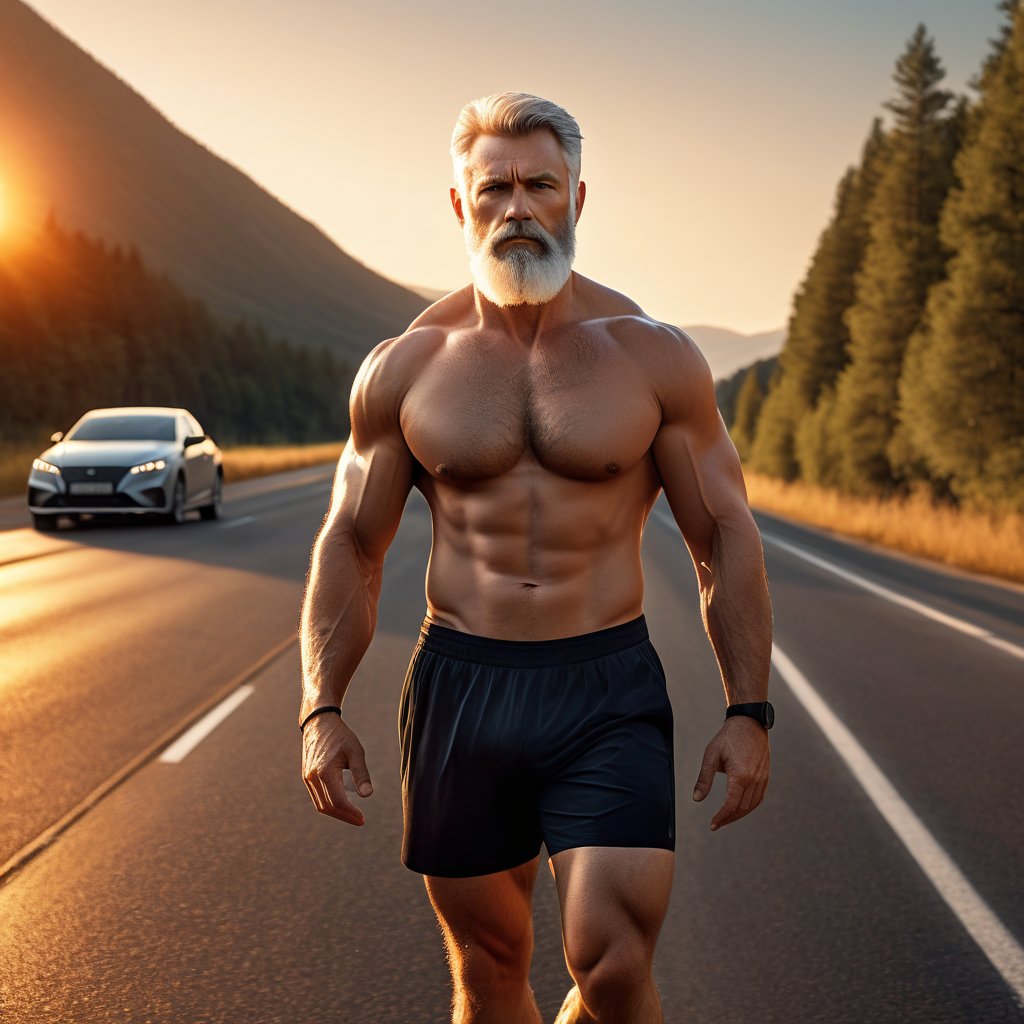

In [5]:
prompt = "Adult man, White beared, strong muscles, super realistic, 8k, photorealistic, sunset, on the road"
steps = 40
guidance = 9
neg = "three foot, extra eyes,bad tounge,airbrushed, illustration, painting, render, worst quality, low quality, normal quality,gross proportions,lowres, blurry tounge,bad eye, bad face, blurry face, blurry lips, extra face, three arms, extra body, extra digit,missing arm, missing leg, missing lips, missing nose, missing body, missing eyes, missing ears, missing hairs, missing eye lashes, mutated hands, bad body, bad propogations, long neck, cross-eyed, missing fingers, easynegative, bad anatomy, blurry body, blury image, blury faces, blurry teeths, blurry lips, not following the prompt  "

image = pipeline(
    prompt,
    num_inference_steps = steps,
    guidance_scale = guidance,
    negative_prompt = neg,
		# cross_attention_kwargs={"scale": lora_scale}
    ).images[0]
image